## Exercise1 on Sep 21st, 2022

In [ ]:
%%bash
pip install -r requirements.txt > /dev/null 2>&1

### Load MNIST dataset

#### import the dataset and libraries

In [11]:
import numpy as np
from keras.datasets import mnist
from keras.utils import to_categorical
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import optimizers
import matplotlib.pyplot as plt

#### data transformation

(60000, 28, 28)
(10000, 28, 28)


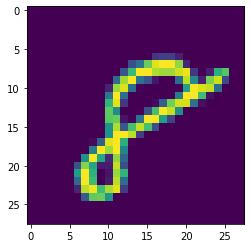

In [6]:
# Loads the data
(train_data, train_labels), (test_data, test_labels) = mnist.load_data()
# print the original shape of $train_data
print(train_data.shape)
print(test_data.shape)
# Plots a single digit from the data
plt.imshow(train_data[train_data.shape[0]-1])
plt.show()
# Reshapes the data to work in an FEN
train_data = train_data.reshape((60000, 28**2))
test_data = test_data.reshape((10000, 28**2))
num_classes = len(np.unique(train_labels))
train_labels = to_categorical(train_labels, num_classes)
test_labels = to_categorical(test_labels, num_classes)

In [7]:
num_classes

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

#### construct the model (reference: https://keras.io/api/layers/core_layers/dense/, https://www.tensorflow.org/api_docs/python/tf/keras/Model#fit)

#### Exercise 1.1: Construct the model, thus compile the model

In [53]:
model = keras.Sequential()
# two hidden layers are in this model
model.add(layers.Dense(num_classes, activation='relu', input_shape=(28**2, )))
model.add(layers.Dense(num_classes, activation='relu'))
model.add(layers.Dense(num_classes, activation='relu'))
model.add(layers.Dense(num_classes, activation='softmax'))

In [54]:
# use $model_cp to test "rmsprop" optimizer
model_cp = model 
model_cp.compile(
    optimizer=optimizers.RMSprop(lr=0.001),
    loss="categorical_crossentropy",
    metrics="accuracy"
)
rmsprop_train_history = model_cp.fit(x=train_data, y=train_labels, batch_size=64, epochs=20, 
             validation_data=(test_data, test_labels), use_multiprocessing=True)

Epoch 1/20


/home/jiawei/anaconda3/lib/python3.7/site-packages/keras/optimizers/optimizer_v2/rmsprop.py:140: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


938/938 [==============================] - 4s 3ms/step - loss: 1.8612 - accuracy: 0.4943 - val_loss: 1.0088 - val_accuracy: 0.6274
Epoch 2/20
938/938 [==============================] - 3s 3ms/step - loss: 0.8759 - accuracy: 0.6981 - val_loss: 0.8496 - val_accuracy: 0.7452
Epoch 3/20
938/938 [==============================] - 3s 3ms/step - loss: 0.6911 - accuracy: 0.7899 - val_loss: 0.6535 - val_accuracy: 0.8125
Epoch 4/20
938/938 [==============================] - 3s 3ms/step - loss: 0.6037 - accuracy: 0.8259 - val_loss: 0.5733 - val_accuracy: 0.8396
Epoch 5/20
938/938 [==============================] - 3s 3ms/step - loss: 0.5422 - accuracy: 0.8530 - val_loss: 0.5515 - val_accuracy: 0.8553
Epoch 6/20
938/938 [==============================] - 3s 3ms/step - loss: 0.5048 - accuracy: 0.8659 - val_loss: 0.5019 - val_accuracy: 0.8785
Epoch 7/20
938/938 [==============================] - 3s 3ms/step - loss: 0.4725 - accuracy: 0.8751 - val_loss: 0.4679 - val_accuracy: 0.8787
Epoch 8/20
938/93

In [55]:
# "Adam" optimizer
model.compile(
    optimizer=optimizers.Adam(lr=0.001),
    loss="categorical_crossentropy",
    metrics="accuracy"
)
adam_train_history = model.fit(x=train_data, y=train_labels, batch_size=64, epochs=20, 
             validation_data=(test_data, test_labels), use_multiprocessing=True)

Epoch 1/20


/home/jiawei/anaconda3/lib/python3.7/site-packages/keras/optimizers/optimizer_v2/adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


938/938 [==============================] - 4s 3ms/step - loss: 0.3187 - accuracy: 0.9139 - val_loss: 0.3238 - val_accuracy: 0.9160
Epoch 2/20
938/938 [==============================] - 3s 3ms/step - loss: 0.3021 - accuracy: 0.9184 - val_loss: 0.3202 - val_accuracy: 0.9164
Epoch 3/20
938/938 [==============================] - 3s 3ms/step - loss: 0.2930 - accuracy: 0.9214 - val_loss: 0.3032 - val_accuracy: 0.9191
Epoch 4/20
938/938 [==============================] - 3s 3ms/step - loss: 0.2798 - accuracy: 0.9239 - val_loss: 0.3004 - val_accuracy: 0.9236
Epoch 5/20
938/938 [==============================] - 3s 3ms/step - loss: 0.2767 - accuracy: 0.9249 - val_loss: 0.2983 - val_accuracy: 0.9207
Epoch 6/20
938/938 [==============================] - 3s 3ms/step - loss: 0.2696 - accuracy: 0.9263 - val_loss: 0.3056 - val_accuracy: 0.9208
Epoch 7/20
938/938 [==============================] - 3s 3ms/step - loss: 0.2592 - accuracy: 0.9294 - val_loss: 0.3040 - val_accuracy: 0.9226
Epoch 8/20
938/93

#### Compare "Adam" and "rmsprop" optimizer. Reference: https://www.tensorflow.org/api_docs/python/tf/keras/optimizers

#### Exercise 1.2: Report the accuracy of the models (Adam and RmsProp respectively)

In [56]:
adam_acc = model.evaluate(test_data, test_labels)[1] # returns to (loss, accuracy)
rmsprop_acc = model_cp.evaluate(test_data, test_labels)[1] # returns to (loss, accuracy)
print(f"Accuracy of the Adam model: {round(adam_acc, 4)}", 
      f"Accuracy of the RmsProps model: {round(rmsprop_acc, 4)}")

313/313 [==============================] - 1s 2ms/step - loss: 0.2675 - accuracy: 0.9284
Accuracy of the Adam model: 0.9284 Accuracy of the RmsProps model: 0.9284


#### Exercise 1.3: Plot the learning history from the history element

In [65]:
print(type(adam_train_history.history), type(rmsprop_train_history.history))
print(adam_train_history.history.keys())

<class 'dict'> <class 'dict'>
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [68]:
type(adam_train_history)

keras.callbacks.History

In [79]:
def plot_training(history: keras.callbacks.History, title_suffix: str):    
    num_epochs = len(history.history['loss'])
    plt.plot(range(num_epochs), history.history['loss'], '-', color='r', label='Training loss')
    plt.plot(range(num_epochs), history.history['val_loss'], '--', color='purple', label='Validation loss')
    plt.plot(range(num_epochs), history.history['accuracy'], '-', color='b', label='Training accuracy')
    plt.plot(range(num_epochs), history.history['val_accuracy'], '--', color='purple', label='Validation accuracy')
    plt.title(f'Training and validation loss {title_suffix}')
    plt.xlabel('Epochs')
    plt.ylabel('Loss / Accuracy')
    plt.legend()
    plt.show()

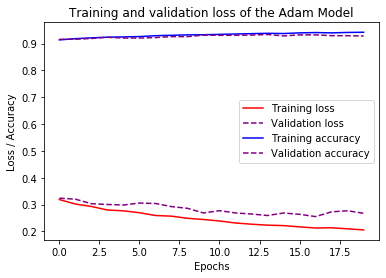

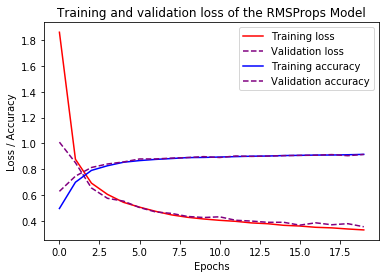

In [80]:
plot_training(adam_train_history, "of the Adam Model")
plot_training(rmsprop_train_history, "of the RMSProps Model")